In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [39]:
a = 3
b = 2
# 以下は，等差数列を作成し，
x = torch.linspace(0, 5, 100).view(100, 1)
print(x)

tensor([[0.0000],
        [0.0505],
        [0.1010],
        [0.1515],
        [0.2020],
        [0.2525],
        [0.3030],
        [0.3535],
        [0.4040],
        [0.4545],
        [0.5051],
        [0.5556],
        [0.6061],
        [0.6566],
        [0.7071],
        [0.7576],
        [0.8081],
        [0.8586],
        [0.9091],
        [0.9596],
        [1.0101],
        [1.0606],
        [1.1111],
        [1.1616],
        [1.2121],
        [1.2626],
        [1.3131],
        [1.3636],
        [1.4141],
        [1.4646],
        [1.5152],
        [1.5657],
        [1.6162],
        [1.6667],
        [1.7172],
        [1.7677],
        [1.8182],
        [1.8687],
        [1.9192],
        [1.9697],
        [2.0202],
        [2.0707],
        [2.1212],
        [2.1717],
        [2.2222],
        [2.2727],
        [2.3232],
        [2.3737],
        [2.4242],
        [2.4747],
        [2.5253],
        [2.5758],
        [2.6263],
        [2.6768],
        [2.7273],
        [2

In [12]:
eps = torch.randn(100, 1)
y = a * x * b + eps

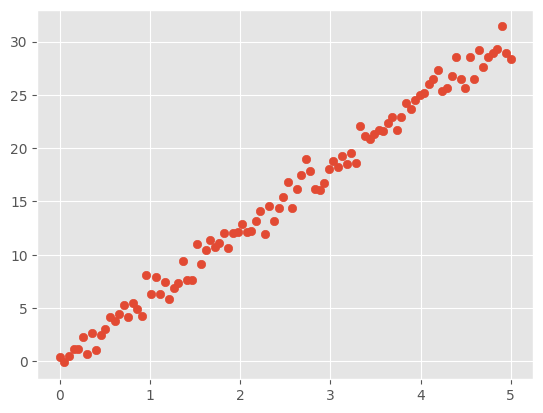

In [13]:
plt.scatter(x, y)

In [19]:
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)
  def forward(self, x):
    output = self.linear(x)
    return output

In [20]:
model = LR()

In [21]:
x_test = torch.tensor([[1.0], [2.0]])

In [22]:
model(x_test)

tensor([[-1.0078],
        [-1.9348]], grad_fn=<AddmmBackward0>)

In [23]:
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [24]:
x2.size()

torch.Size([100, 1])

In [25]:
y_pred = model(x2)

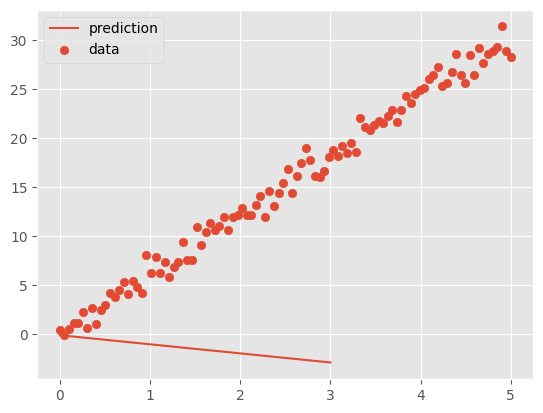

In [28]:
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [31]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [36]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
  optimizer.zero_grad()
  y_pred = model(x)
  loss = criterion(y_pred, y)
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    print("epoch: {}, loss: {}".format(epoch, loss.item()))
    losses.append(loss.item())

epoch: 0, loss: 401.7311706542969
epoch: 10, loss: 278.2718200683594
epoch: 20, loss: 192.91531372070312
epoch: 30, loss: 133.90150451660156
epoch: 40, loss: 93.09976196289062
epoch: 50, loss: 64.88905334472656
epoch: 60, loss: 45.38323211669922
epoch: 70, loss: 31.895587921142578
epoch: 80, loss: 22.568647384643555
epoch: 90, loss: 16.118247985839844
epoch: 100, loss: 11.656566619873047
epoch: 110, loss: 8.569828033447266
epoch: 120, loss: 6.4336838722229
epoch: 130, loss: 4.954751968383789
epoch: 140, loss: 3.9302000999450684
epoch: 150, loss: 3.2198126316070557
epoch: 160, loss: 2.7266454696655273
epoch: 170, loss: 2.3836660385131836
epoch: 180, loss: 2.144535779953003
epoch: 190, loss: 1.977229118347168
epoch: 200, loss: 1.8595912456512451
epoch: 210, loss: 1.7763090133666992
epoch: 220, loss: 1.7168010473251343
epoch: 230, loss: 1.6737459897994995
epoch: 240, loss: 1.6420817375183105
epoch: 250, loss: 1.6183124780654907
epoch: 260, loss: 1.6000174283981323
epoch: 270, loss: 1.5855

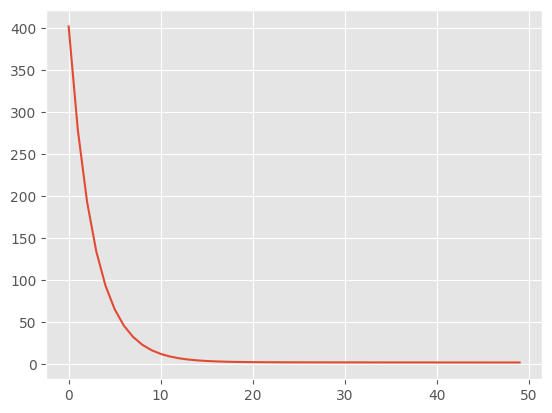

In [37]:
plt.plot(losses)

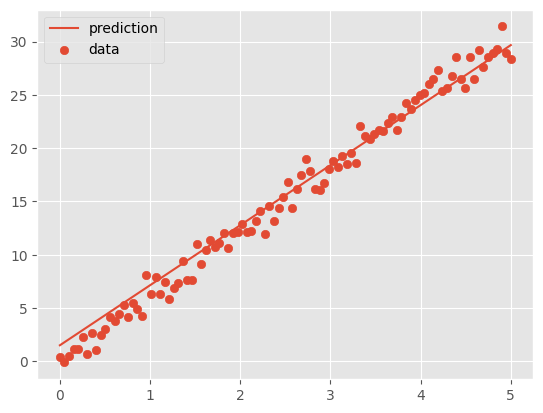

In [38]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()